# Clustering - K-means
Reference: <br>
Reference:
Clustering: https://qiita.com/maskot1977/items/34158d044711231c4292 <br>
Choose cluster number: https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

In [17]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

In [18]:
# Import dataset
df = pd.read_csv('auto-mpg_clean.csv')
print(df.shape)
df.head()

(383, 7)


,car name,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5


### Elbow method

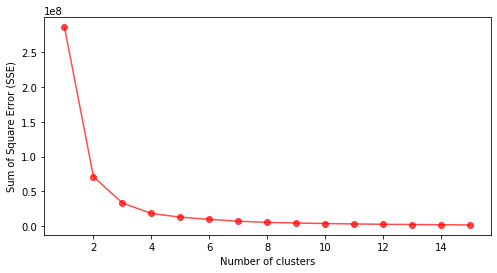

In [19]:
# Check the good number of clusters
sse = list()

for i  in range(1,16):                                             # test upto 15 clusters 
    km = KMeans(n_clusters=i, random_state=1).fit(df.iloc[:, 1:7])
    sse.append(km.inertia_)                                        # .inertia_ = sum of square error

plt.figure(figsize=(8, 4))
plt.plot(range(1,16), sse, c='r', marker='o', alpha = 0.7)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Error (SSE)')
plt.show()

### Determine cluster number for K-means

In [20]:
# Choose numbers of clusters you want to make (max = 10 due to color constraint in the plots)
num = input('Input number of clusters you want to make : ')

Input number of clusters you want to make : 3


In [21]:
# Make a model
kmeans_model = KMeans(n_clusters=int(num), random_state=1).fit(df.iloc[:, 1:7])

In [22]:
# Get labels
labels = kmeans_model.labels_
print('labels = ', labels)

# Check labels
print('Number of labels = ', len(labels))
print('Number of data   = ', len(df))

labels =  [2 2 2 2 2 0 0 0 0 0 2 2 0 2 1 2 2 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 2 2 2 2 0
 0 0 0 0 0 0 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0
 2 1 2 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 0 0 0 0 2 1 1 1 1 1 1
 0 0 1 1 1 2 2 1 2 2 2 2 2 1 1 1 0 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 0 0 0 0 0 0 2 0 2 2 2 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 0 0 0 0 2 2 2
 1 1 1 1 2 2 2 2 1 1 1 2 0 2 2 0 0 0 0 0 1 1 1 1 1 0 0 0 0 2 2 2 2 0 0 0 0
 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 1 1 1 1
 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 0 2 0 0 0 0 2 0 1 1 1 1 2 0 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 2 1 1 2 2 1 1 1 1]
Number of labels =  383
Number of data   =  383


In [23]:
# Add culumn 'CLS_label' as clustering label
df['CLS_label'] = labels
print(df.shape)
df.head()

(383, 8)


,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,CLS_label
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,2
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,2
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,2
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,2
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,2


### Scatter plot of clusters

In [24]:
# Make list of colors to draw scatter plot in different colors by cluster 
color_codes = {0:'red',
               1:'green',
               2:'blue',
               3:'yellow',
               4:'magenta',
               5:'cyan',
               6:'black',
               7:'brown',
               8:'orange',
               9:'pink'}

colors = list()
for i in range(len(labels)) :
    colors.append(color_codes[labels[i]])

In [25]:
# Save files and print data size by label
for i in range(int(num)) :
  label_num = i
  df_new = df[df['CLS_label'] == label_num]
  print('data size of CLS label ', label_num, 'color:', color_codes.get(i), ' = ', len(df_new), sep = '\t')
  df_new.to_csv('K-means_cluster_' + str(label_num) + '.csv')

data size of CLS label 	0	color:	red	 = 	85
data size of CLS label 	1	color:	green	 = 	181
data size of CLS label 	2	color:	blue	 = 	117


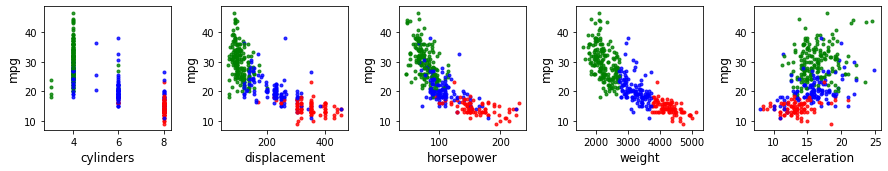

In [26]:
# Draw scatter plots by clusters
horz = 5                     # horizontal number of graph
vert = 5                     # vertical number of graph
graph_num = horz * vert      # maximum number of graphs

axes = list()
fig = plt.figure(figsize=(15, 15))

for i in range(1, len(df.columns) - 2):
    axes.append(fig.add_subplot(vert, horz, i))
    for j in range(len(df)) :
        x = df.iloc[j, i+1]
        y = df.iloc[j, 1]
        axes[i-1].scatter(x, y, marker='.', c = colors[j], alpha = 0.8)
    axes[i-1].set_xlabel(df.columns[i+1], size = 12)
    axes[i-1].set_ylabel(df.columns[1], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig('K-means visualization.png')
plt.show()